# Feature Selection using Random Forest. 

Input parameters:
- parm_features_RandomForestReg_X: features dataframe
- parm_features_RandomForestReg_Y: target dataframe

Functions are defined to return results:
- out_features_RandomForestReg_X: list of features
- out_features_RandomForestReg_X_R2: R Squared 

Fit a random forest regressor estimator to visualize imporant features and estimator performance.

In [ ]:
# define random forest regressor estimator with n_estimator trees
rf = RandomForestRegressor(n_estimators= 20, random_state=5)
# fit the estimator
rf.fit(parm_features_RandomForestReg_X, parm_features_RandomForestReg_Y)

RandomForestRegressor()

R2 Score:  0.8758464552361354


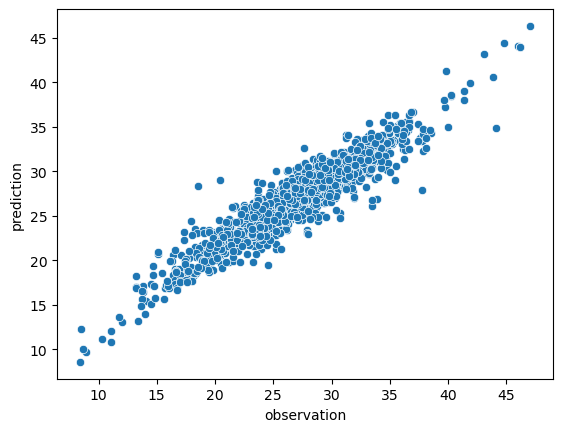

In [225]:
Y_pred = rf.predict(parm_features_RandomForestReg_X)
print("R2 Score: ", r2_score(parm_features_RandomForestReg_Y, Y_pred))

plt.title('RandomForestRegressor Prediction - Observed')
featuresList = parm_features_RandomForestReg_Y.tolist()
scatterplot(x=featuresList, y=Y_pred)
plt.xlabel("observation")
plt.ylabel("prediction")
plt.show()

### Feature importance

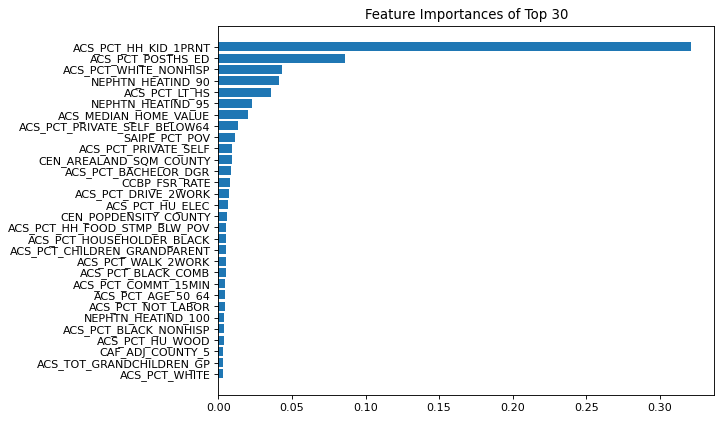

In [ ]:
features = parm_features_RandomForestReg_X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
num_features = 30

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.title('RandomForestRegressorFeature Top 30 Features by Importance')
plt.barh(range(num_features), importances[indices[-num_features:]], align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.show()

Define meta-transformer for selecting features based on importance weights.  get_support chooses top features higher than default threshold of median

In [ ]:
rft = SelectFromModel(estimator = rf)
rft.fit(parm_features_RandomForestReg_X, parm_features_RandomForestReg_Y)

# select_from_model get_support chooses top features over default threshold of median
selected_feat= parm_features_RandomForestReg_X.columns[(rft.get_support())]
selected_feat_list = list(selected_feat)

def out_features_RandomForestReg_X():
   return selected_feat_list

def out_features_RandomForestReg_X_R2():
   return r2_score(parm_features_RandomForestReg_Y, Y_pred)